<a href="https://colab.research.google.com/github/Diksha-Bora/Data-Science-project/blob/main/ScaledLinearRegression_Boston_housing_data5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
# IMPORTING REQUIRED LIBRARIES 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
# IMPORTING DATA AND CLEANING IT FOR ANALYSIS
data = pd.read_csv("/content/BostonHousing.csv")
data.columns = data.columns.str.upper()
data.dropna()
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [26]:
input = data.drop("MEDV",axis=1)
output = data["MEDV"]

In [27]:
# TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
input_train,input_test,output_train,output_test = train_test_split(input,output,test_size=0.5,random_state =2)
print("Size of input_train is: ",input_train.shape)
print("Size of output_train is: ",output_train.shape)
print("Size of input_test is: ",input_test.shape)
print("Size of output_test is: ",output_test.shape)

Size of input_train is:  (253, 13)
Size of output_train is:  (253,)
Size of input_test is:  (253, 13)
Size of output_test is:  (253,)


In [28]:
input_train.mean(axis=0)

CRIM         3.199906
ZN          10.523715
INDUS       11.300198
CHAS         0.063241
NOX          0.550056
RM           6.260771
AGE         67.796838
DIS          3.894343
RAD          9.403162
TAX        404.865613
PTRATIO     18.634783
B          355.424150
LSTAT       12.658617
dtype: float64

In [29]:
input_train.std(axis=0)

CRIM         8.617908
ZN          21.246508
INDUS        6.752854
CHAS         0.243879
NOX          0.113476
RM           0.669712
AGE         28.230224
DIS          2.115244
RAD          8.620959
TAX        167.935615
PTRATIO      2.051997
B           93.842350
LSTAT        6.764707
dtype: float64

In [30]:
# NORMALIZING OR SCALING THE DATA FOR BETTER MODEL ANALYSIS
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
input_train_scaled = scaler.fit_transform(input_train)
input_test_scaled = scaler.transform(input_test)

In [31]:
input_train_scaled.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [32]:
input_test_scaled.std(axis=0)

array([0.99586167, 1.18809402, 1.03300662, 1.08280578, 1.0422769 ,
       1.09689467, 0.99544377, 0.99071657, 1.02162253, 1.00873188,
       1.1024194 , 0.94672469, 1.11047331])

In [33]:
# MODEL PREDICTION ON TRAIN DATA
from sklearn.linear_model import LinearRegression 
lin_reg = LinearRegression()
lin_reg.fit(input_train_scaled,output_train)

LinearRegression()

In [34]:
y_pred_train = lin_reg.predict(input_train_scaled)

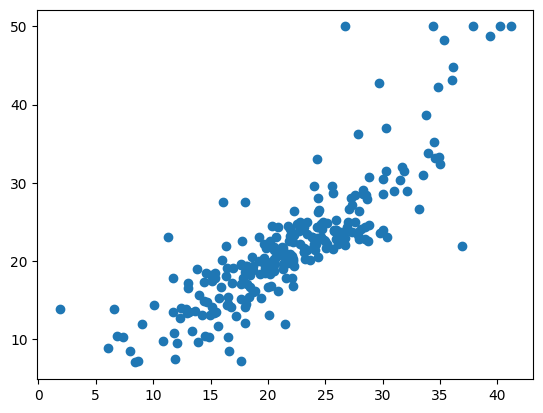

In [35]:
plt.scatter(y_pred_train,output_train)

In [36]:
# MODEL EVALUATION OF TRAIN DATA
from sklearn.metrics import mean_squared_error,r2_score , mean_absolute_error,mean_absolute_percentage_error
print("The mean_squared_error is:",mean_squared_error(output_train,y_pred_train))
print("The r2_score is:",r2_score(output_train,y_pred_train))
print("The mean_absolute_error is:",mean_absolute_error(output_train,y_pred_train))
print("The mean_absolute_percentage_error is:",mean_absolute_percentage_error(output_train,y_pred_train))

The mean_squared_error is: 18.533475208070744
The r2_score is: 0.709983294748658
The mean_absolute_error is: 2.9752125610777322
The mean_absolute_percentage_error is: 0.1485375314634948


In [37]:
# FITTING TEST DATA 
# no need for transforming as the train data is already transformed
lin_reg.fit(input_test_scaled,output_test)

LinearRegression()

In [38]:
# TEST DATA MODEL PREDICION
y_pred_test = lin_reg.predict(input_test_scaled)

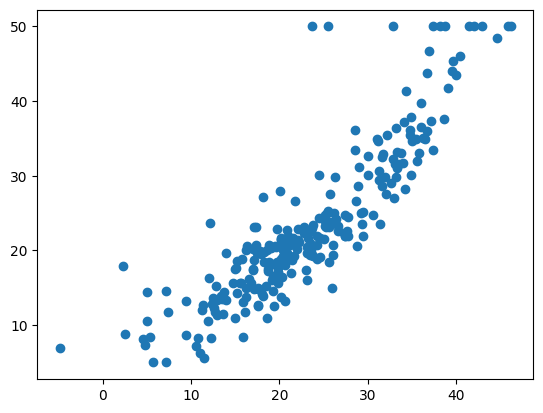

In [39]:
plt.scatter(y_pred_test,output_test)

In [40]:
# MODEL EVALUATION OF TEST DATA
from sklearn.metrics import mean_squared_error,r2_score , mean_absolute_error,mean_absolute_percentage_error
print("The mean_squared_error is:",mean_squared_error(output_test,y_pred_test))
print("The r2_score is:",r2_score(output_test,y_pred_test))
print("The mean_absolute_error is:",mean_absolute_error(output_test,y_pred_test))
print("The mean_absolute_percentage_error is:",mean_absolute_percentage_error(output_test,y_pred_test))

The mean_squared_error is: 23.486594704592143
The r2_score is: 0.7743195616455648
The mean_absolute_error is: 3.434818072745065
The mean_absolute_percentage_error is: 0.17411691238101754
